<a href="https://colab.research.google.com/github/Mrinal-Official/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Mrinal Kanti Paul

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

[Link](https://github.com/Mrinal-Official/Cardiovascular-Risk-Prediction/tree/main)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
import matplotlib.pyplot as plt

# Importing warning liberary
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/Mrinal-Official/Cardiovascular-Risk-Prediction/main/Dataset/cardiovascular_risk_dataset.csv')

### Dataset First View

In [3]:
# Dataset First Look
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isna().sum().sort_values(ascending = False)
print('Missing values count')
print('\n',missing_values,'\n')
print('-'*50)
print('Missing values percentage')
missing_value_percent = round(df.isna().sum().sort_values(ascending = False)/len(df)*100,2)
print('\n',missing_value_percent)

Missing values count

 glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64 

--------------------------------------------------
Missing values percentage

 glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64


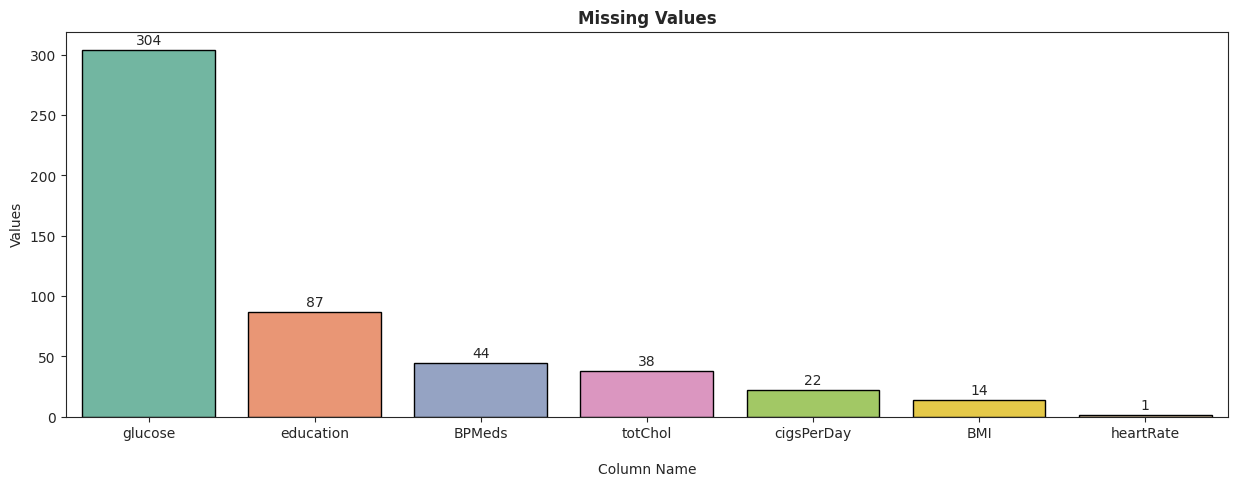

In [8]:
# Visualizing the missing values
plt.figure(figsize = (15,5))
sns.barplot(missing_values.head(7), edgecolor = 'black', palette = 'Set2')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xlabel('\nColumn Name')
plt.ylabel('Values')
plt.title('Missing Values', fontweight = 'bold', fontsize = 12)
plt.show()

### What did you know about your dataset?

1. This dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-years risk of future coronary heart disease(CHD).

2. The dataset provides various information about patients.

3. There a total of 3390 observations across 17 different variables.

4. TenYearCHD is the dependent which we need to predict.

5. There a no duplicates values in this dataset.

6. There are missing values in glucose, education, BPMeds, totChol, cigsPerDay, BMI, heartRate which in total is 510.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include = 'all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f'{col.title()}: \n{df[col].unique()}\n')

Id: 
[   0    1    2 ... 3387 3388 3389]

Age: 
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

Education: 
[ 2.  4.  1.  3. nan]

Sex: 
['F' 'M']

Is_Smoking: 
['YES' 'NO']

Cigsperday: 
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

Bpmeds: 
[ 0. nan  1.]

Prevalentstroke: 
[0 1]

Prevalenthyp: 
[0 1]

Diabetes: 
[0 1]

Totchol: 
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 3

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Setting id column as index
df.set_index('id', inplace=True)

In [13]:
# Distributing our columns in categorical and continuous variable for effective visualisation

categorical_var = [col for col in df.columns if df[col].nunique() < 5]
continuous_var = [col for col in df.columns if col not in categorical_var]

print(f'Categorical variables: {categorical_var}')
print(f'Continuous variables: {continuous_var}')

Categorical variables: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Continuous variables: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [14]:
# Drop null value from dataset if there are any.
df = df.dropna(how='any')

In [15]:
# Dependent variable
dependent_variable = df['TenYearCHD']

In [16]:
# Independent variables
independent_variable = df.iloc[:,:-1]

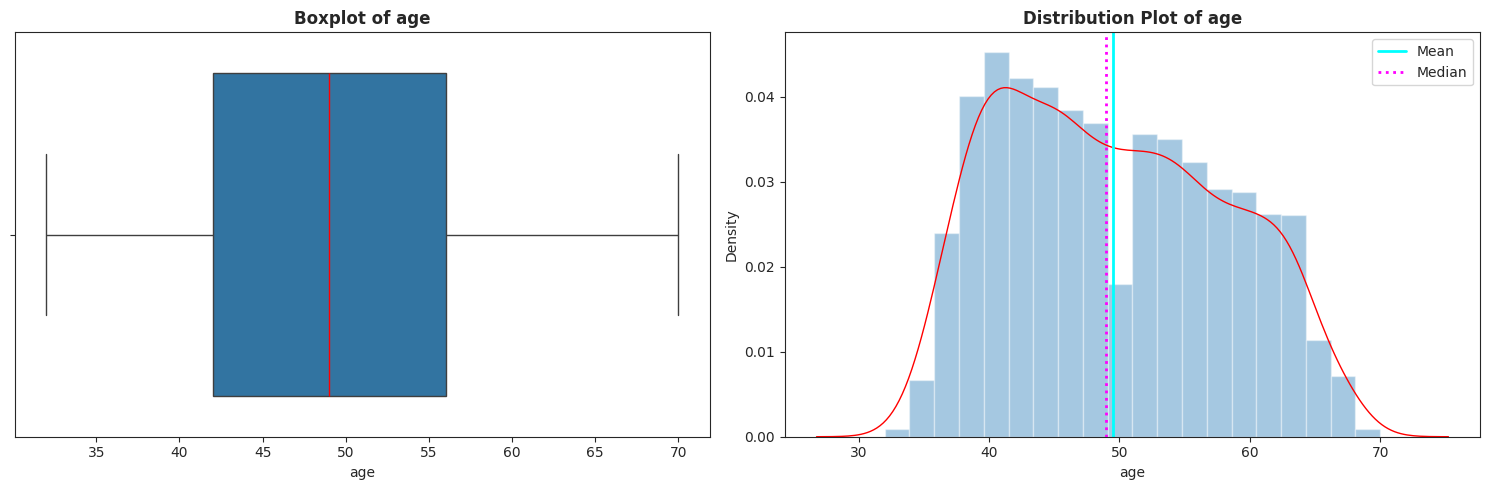

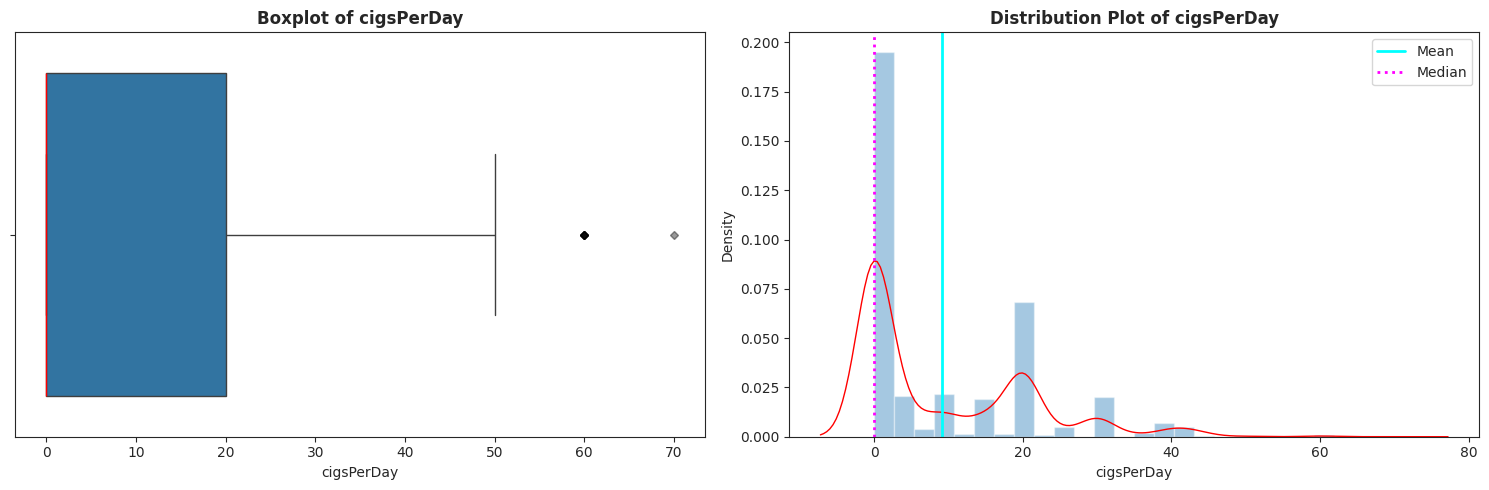

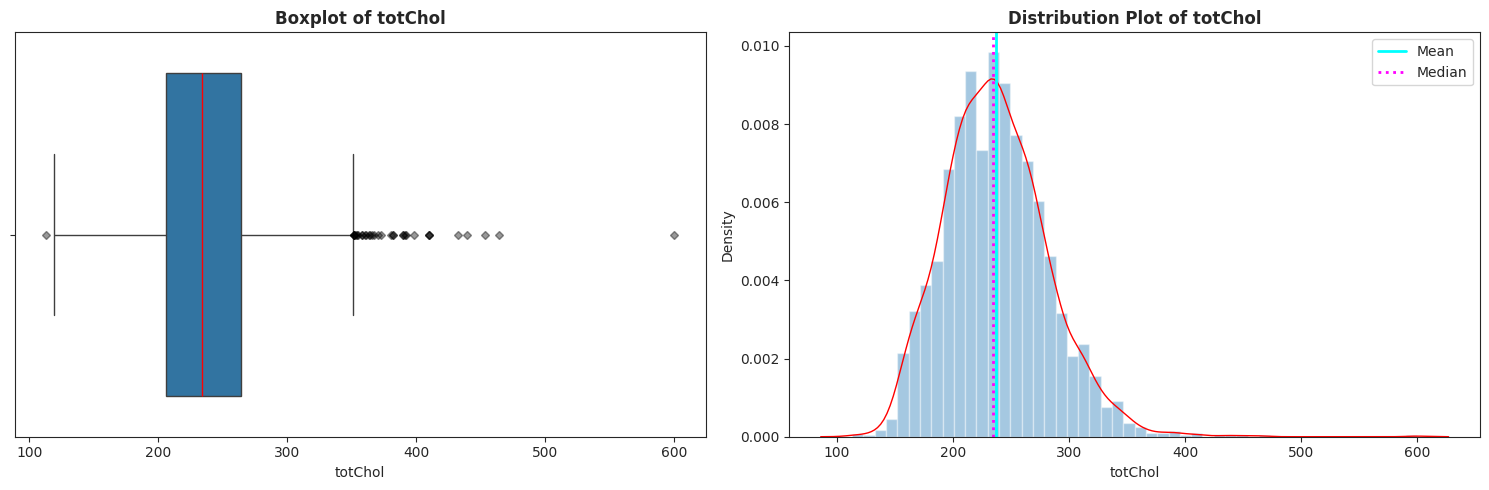

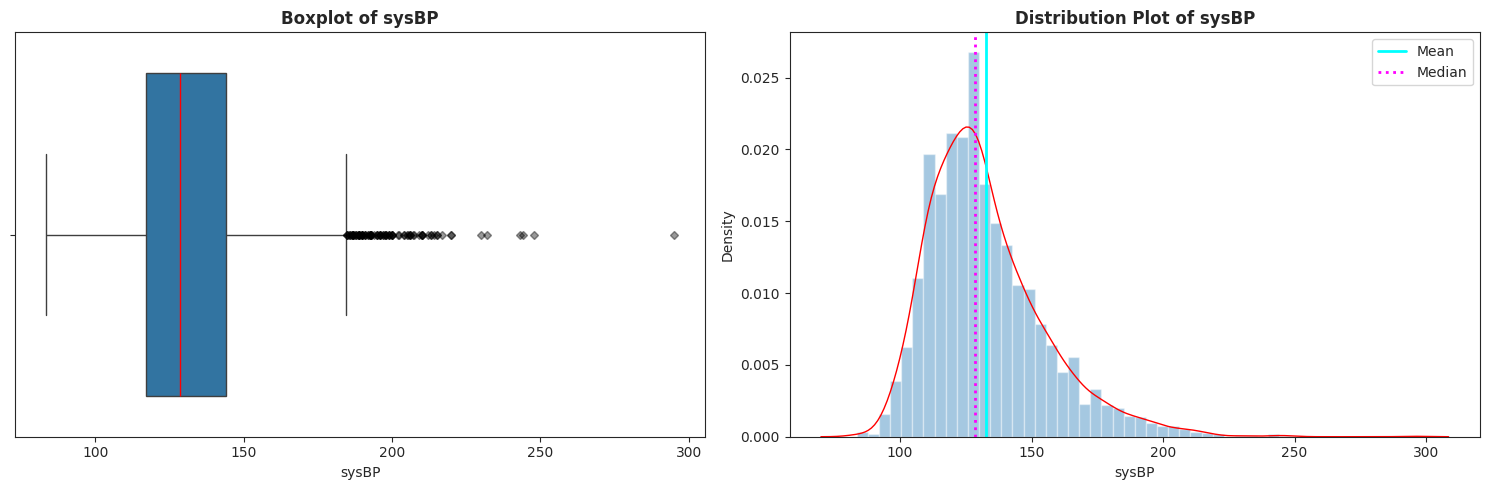

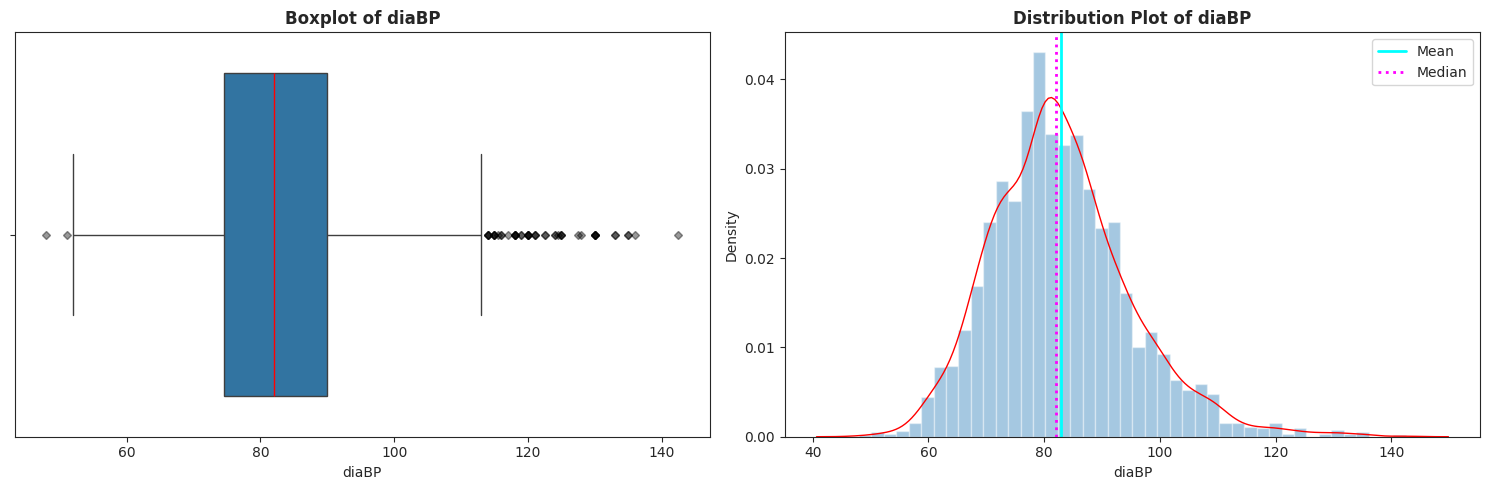

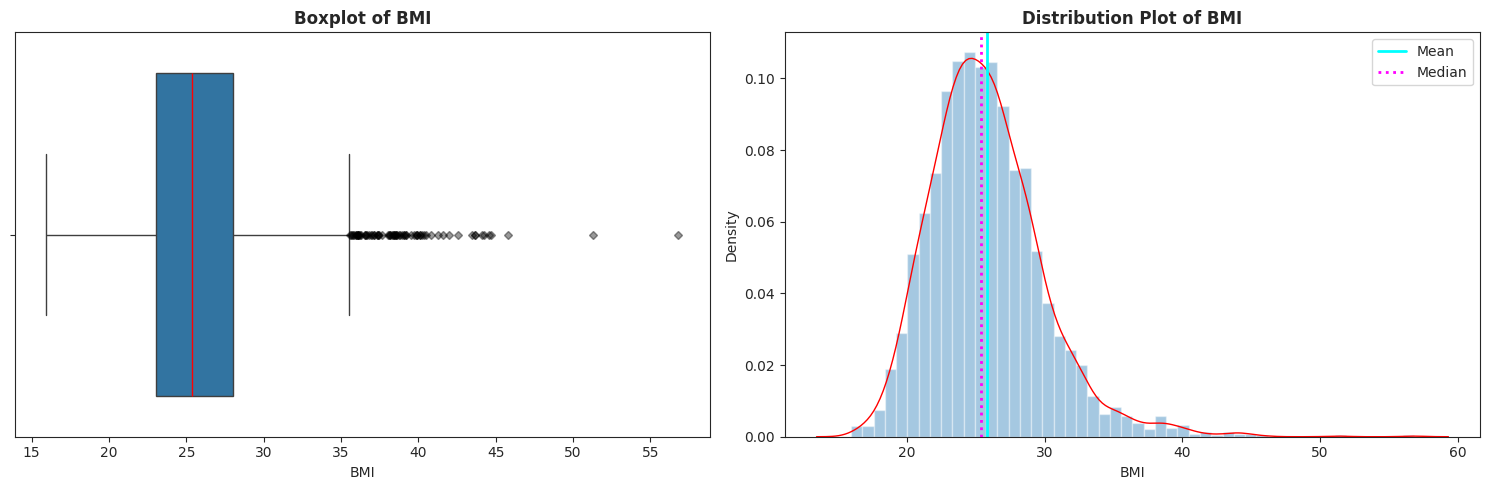

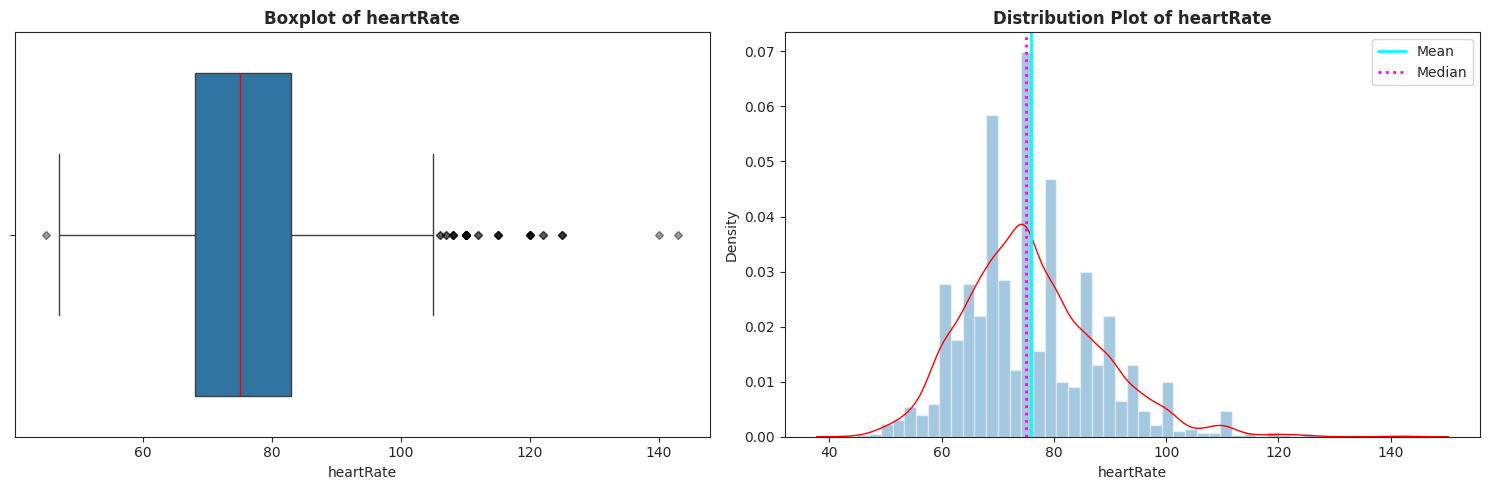

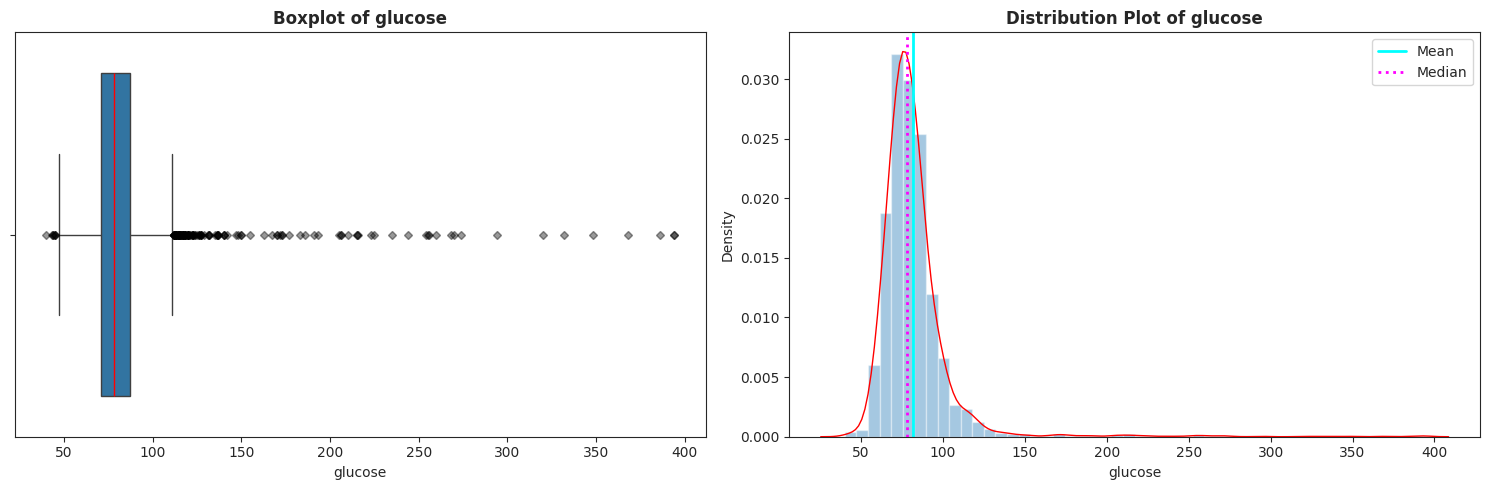

In [17]:
# Visualising the spread of continuous variables
for col in continuous_var:
  plt.figure(figsize=(15, 5))

# Boxplot to visualise outlier
  plt.subplot(1, 2, 1)
  sns.boxplot(x=df[col],
              flierprops={'marker':'D','markerfacecolor':'black','alpha':0.4,'markersize':4,'markeredgecolor':'black'},
              medianprops={'color':'red'})
  plt.title(f'Boxplot of {col}',fontweight = 'bold')


# Distribution plot to visualise distribution and skewness
  plt.subplot(1, 2, 2)
  sns.distplot(df[col],
               kde=True,
               kde_kws={'color':'red','linewidth':1})
  plt.axvline(df[col].mean(), color='cyan', linestyle='-', label='Mean',linewidth=2)
  plt.axvline(df[col].median(), color = 'magenta', linestyle='dotted', label='Median', linewidth = 2)
  plt.title(f'Distribution Plot of {col}',fontweight = 'bold')
  plt.legend()

  plt.tight_layout()
  plt.show()
  print('\n')


In [18]:
# Function to change the upper and lower whiskers to treat outliers

def outlier_treatment(df,features):
  IQR = df[features].quantile(0.75) - df[features].quantile(0.25)
  lower_fence = df[features].quantile(0.25) - (IQR * 1.5)
  upper_fence = df[features].quantile(0.75) + (IQR * 1.5)
  df[features] = df[features].clip(lower_fence, upper_fence,axis=1)
  return df


In [19]:
# Implementing the outlier treatment function on the dataset
df = outlier_treatment(df,continuous_var)

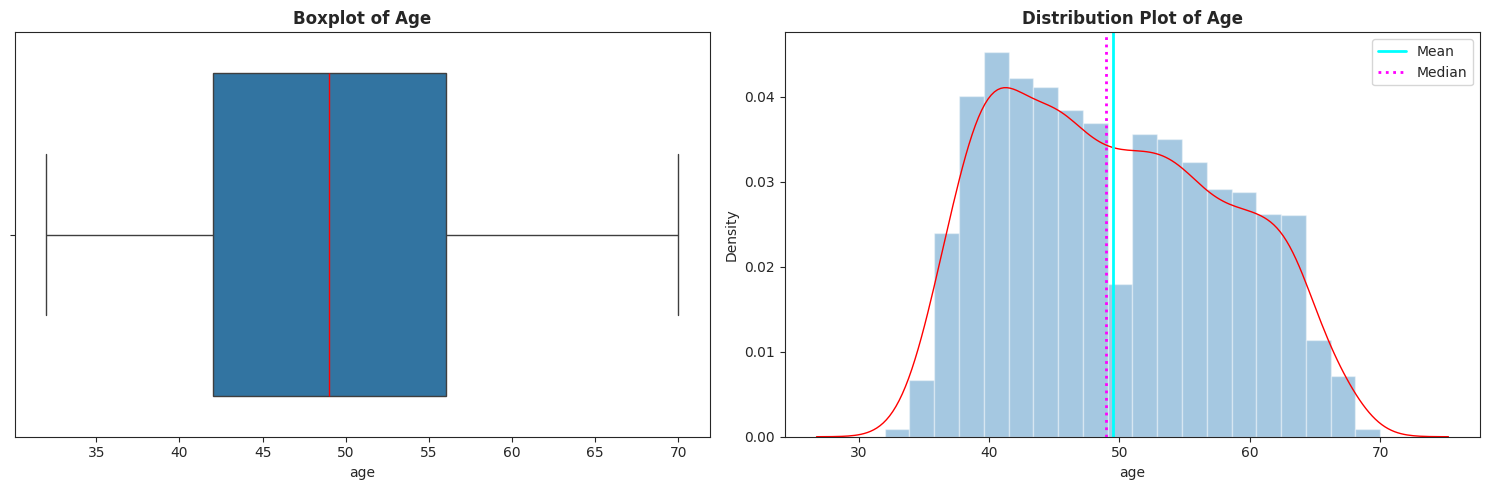

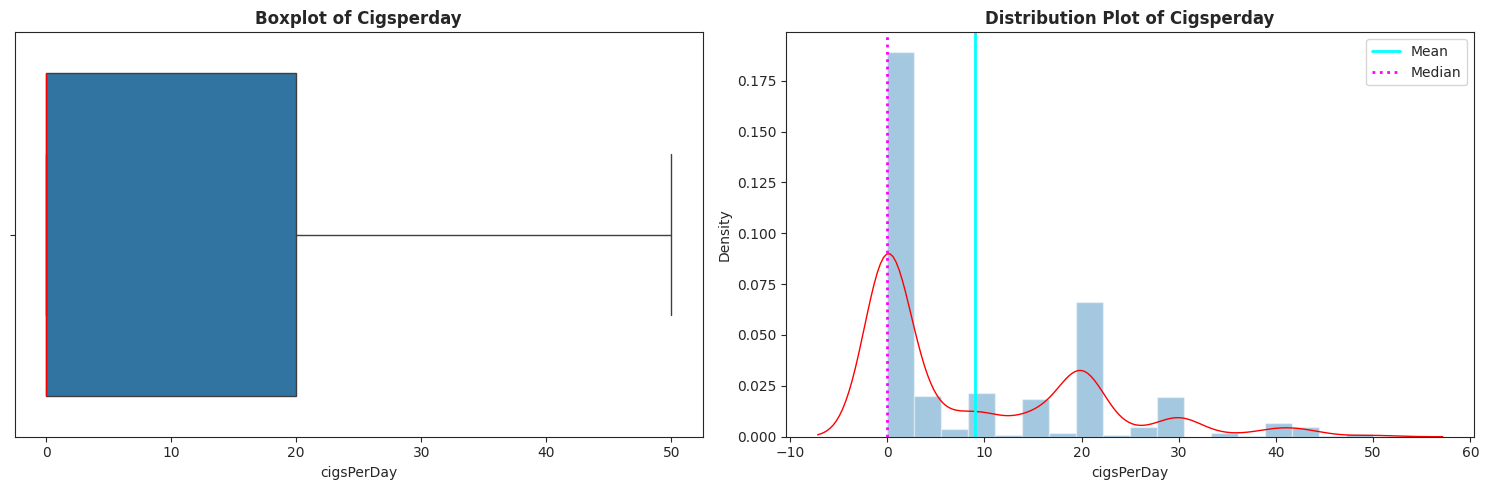

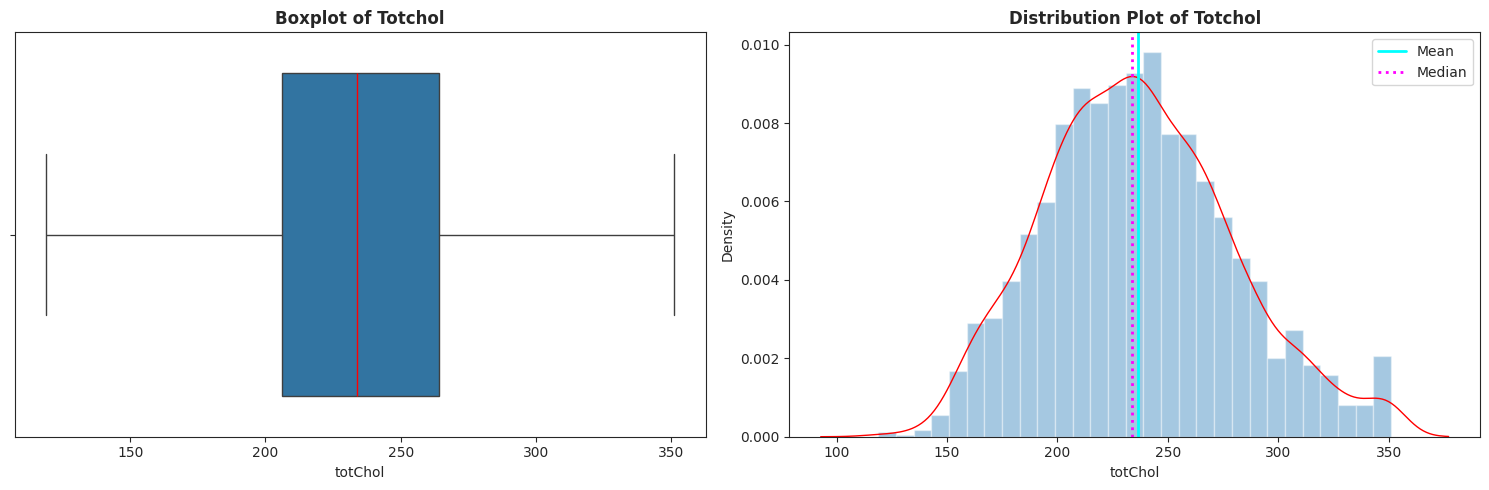

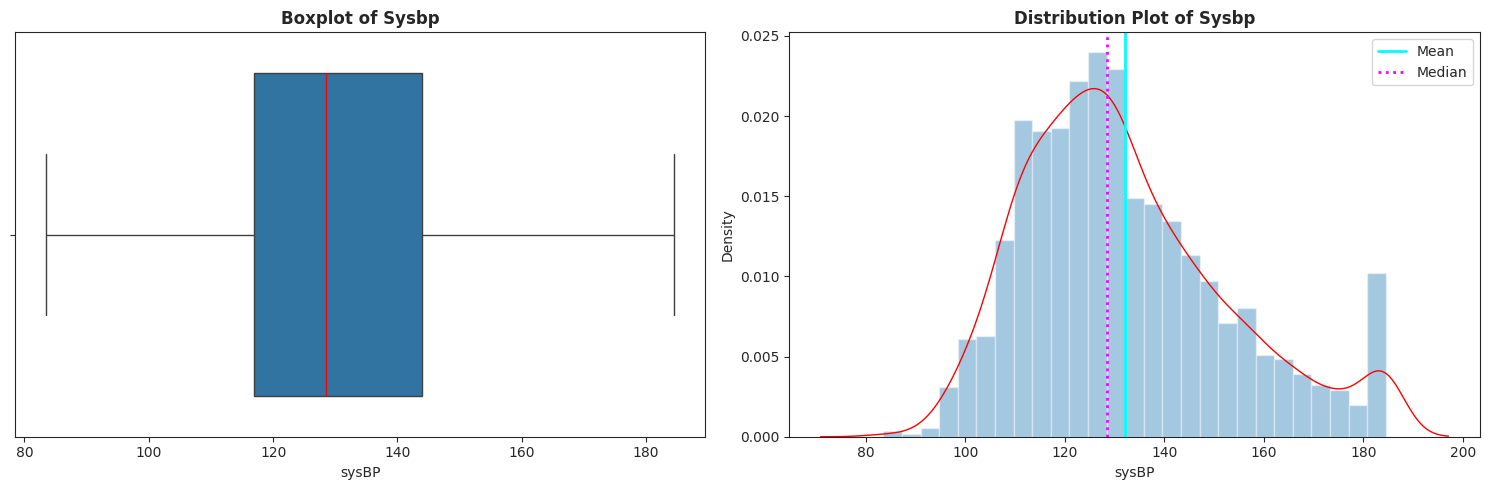

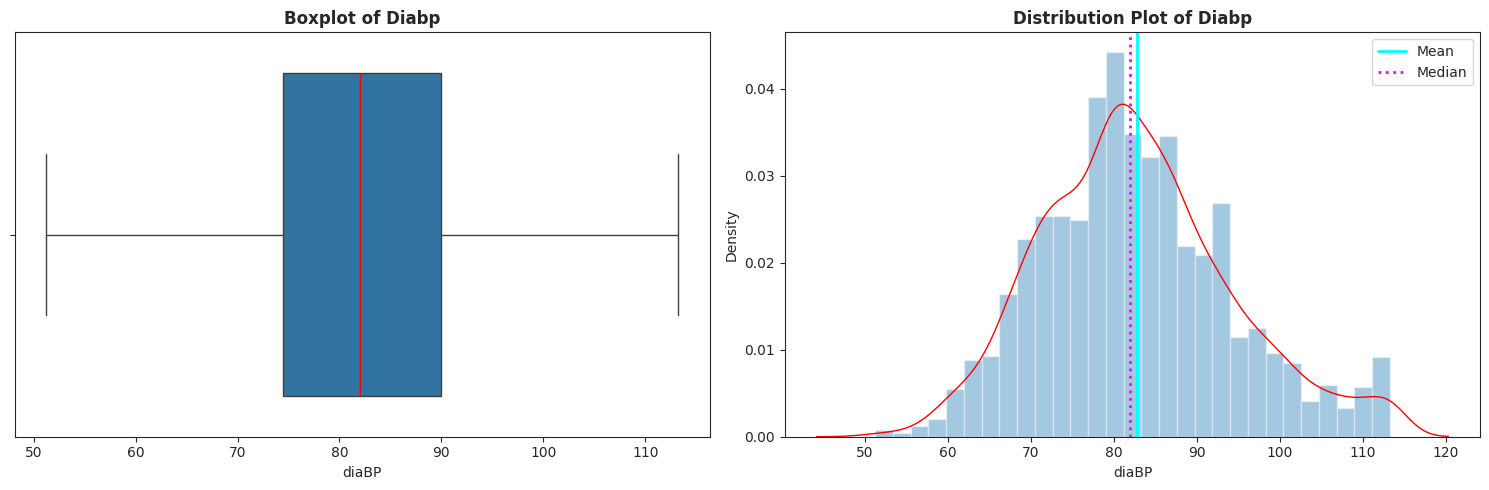

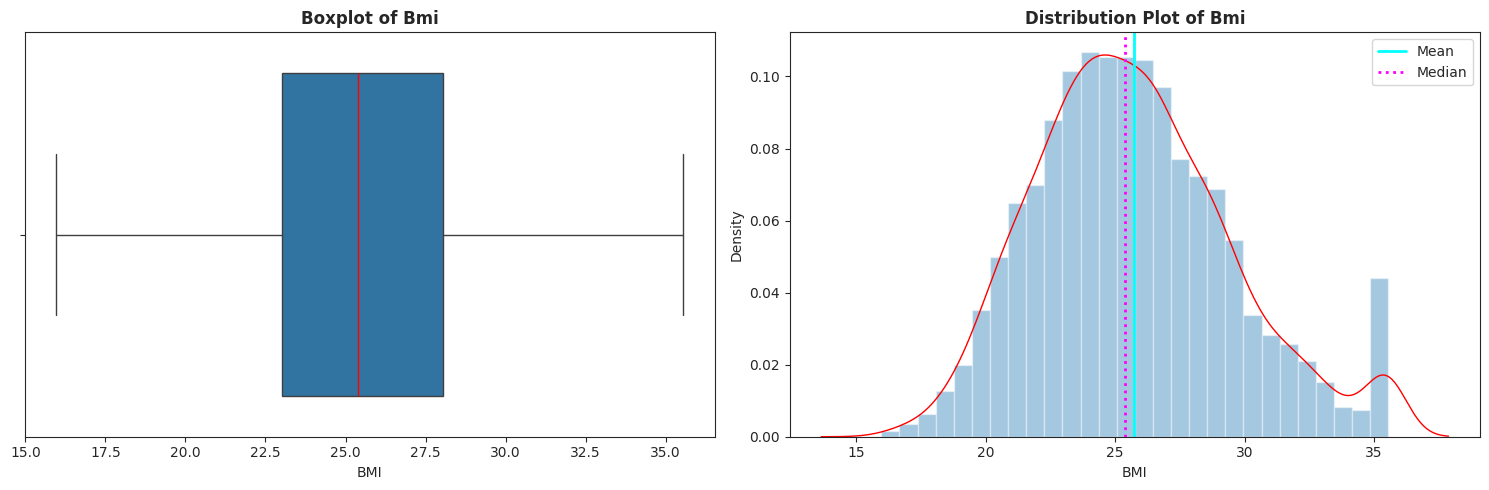

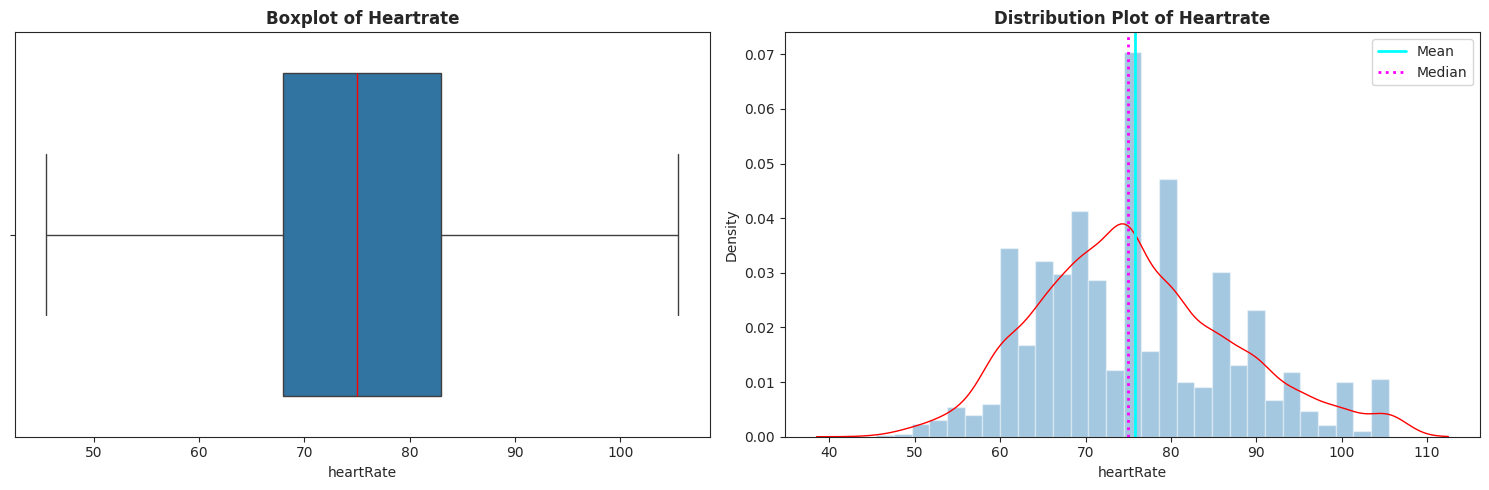

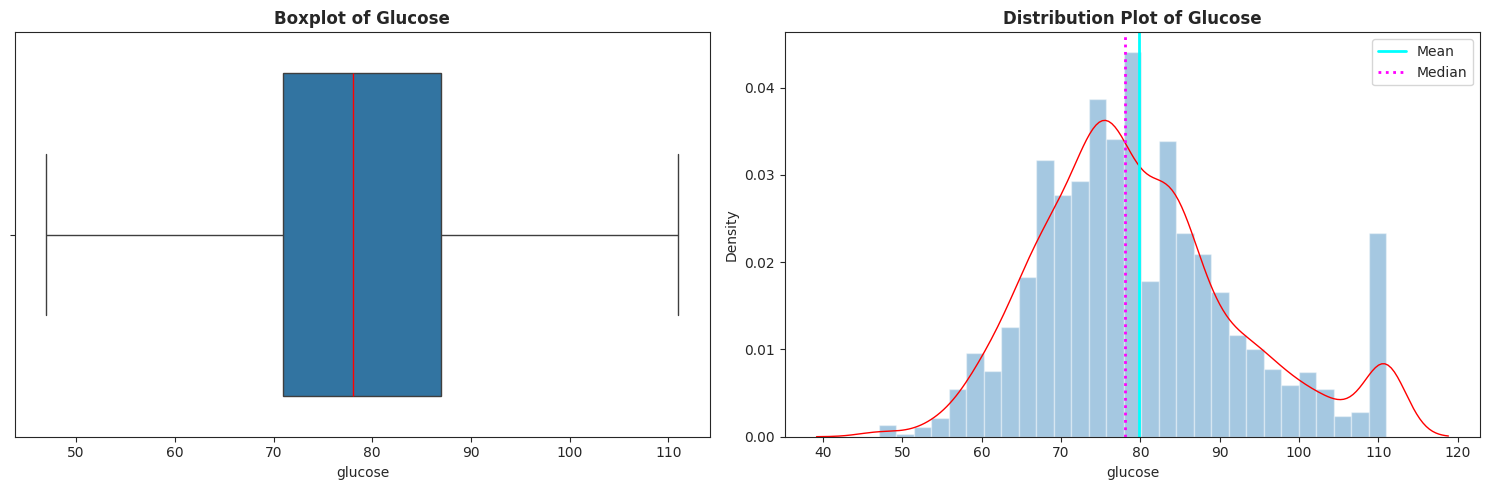

In [20]:
# Visualising the spread of continuous variables after treating outliers
for col in continuous_var:
  plt.figure(figsize=(15, 5))

# Boxplot to visualise outliers
  plt.subplot(1, 2, 1)
  sns.boxplot(x=df[col],
              flierprops={'marker':'D','markerfacecolor':'black','alpha':0.4,'markersize':4,'markeredgecolor':'black'},
              medianprops={'color':'red'})
  plt.title(f'Boxplot of {col.title()}',fontweight = 'bold')


# Distribution plot to visualise distribution and skewness
  plt.subplot(1, 2, 2)
  sns.distplot(df[col],
               kde=True,
               kde_kws={'color':'red','linewidth':1})
  plt.axvline(df[col].mean(), color='cyan', linestyle='-', label='Mean',linewidth=2)
  plt.axvline(df[col].median(), color = 'magenta', linestyle='dotted', label='Median', linewidth = 2)
  plt.title(f'Distribution Plot of {col.title()}',fontweight = 'bold')
  plt.legend()

  plt.tight_layout()
  plt.show()
  print('\n')


### What all manipulations have you done and insights you found?

**1. Set id column as index.**

Insights:- As id doesnot provide any important information about a patient so we made id as our index. Now we have 16 different variables.

**2. Splitted our features into categorical and continuous variables.**

Insights:- Features having unique values less than 5 are categorical variables and the leftover features as continuous variable.

**3. Outlier treatment**

Insights:- Continuous variables before treating outliers result in skewness.

**4. Dependent variables**

Insights:- Asign df['TenYearCHD'] as dependent variable.

**5.Independent variables**

Insights:- All feratures other than TenYesCHD as independent variable.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

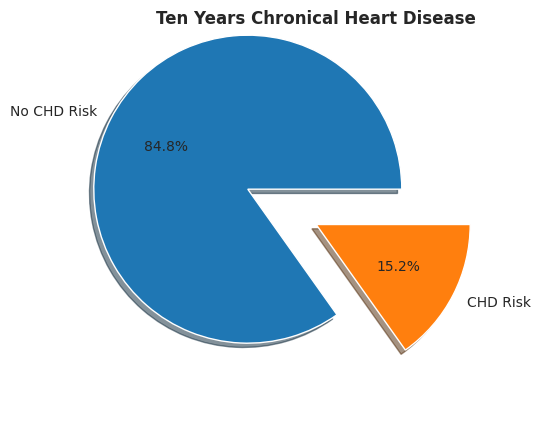

In [45]:
# Chart - 1 visualization code
plt.figure(figsize = (10,5))

plt.pie(dependent_variable.value_counts(),labels=['No CHD Risk', 'CHD Risk'], autopct='%.1f%%', explode=[0.5,0],shadow=True)
plt.title('Ten Years Chronical Heart Disease', fontweight = 'bold', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Pie plot is effective when showing categorical variable.

##### 2. What is/are the insight(s) found from the chart?

We can see that our dataset is imbalance with more numbers of people about 84.8% not at the risk of cronical heart disease and 15.4% at the risk of cronical heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

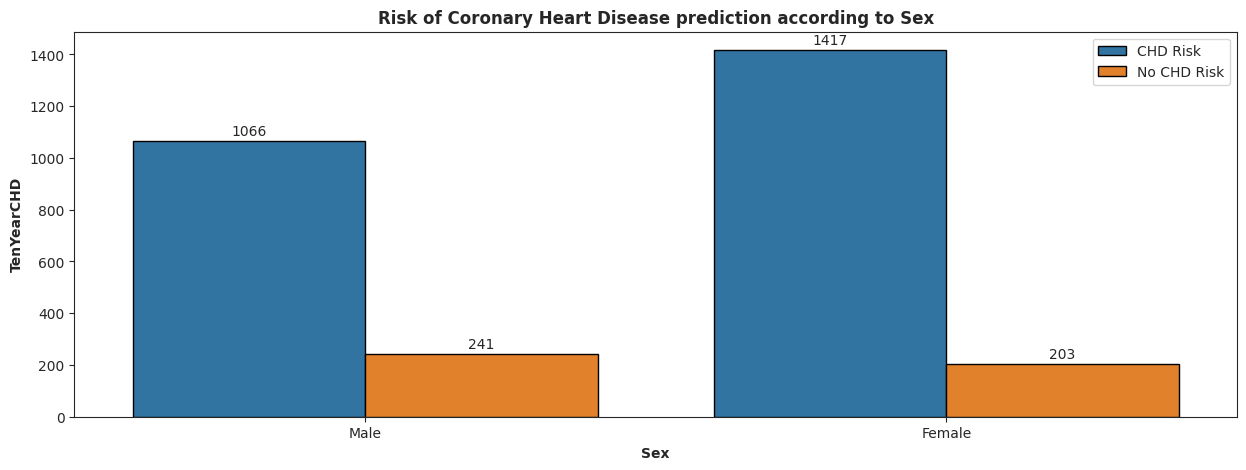

In [226]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=df['sex'],hue=df['TenYearCHD'],edgecolor='black')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('TenYearCHD', fontweight='bold')
plt.title('Risk of Coronary Heart Disease prediction according to Sex',fontweight='bold',fontsize=12)
plt.legend(['CHD Risk','No CHD Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

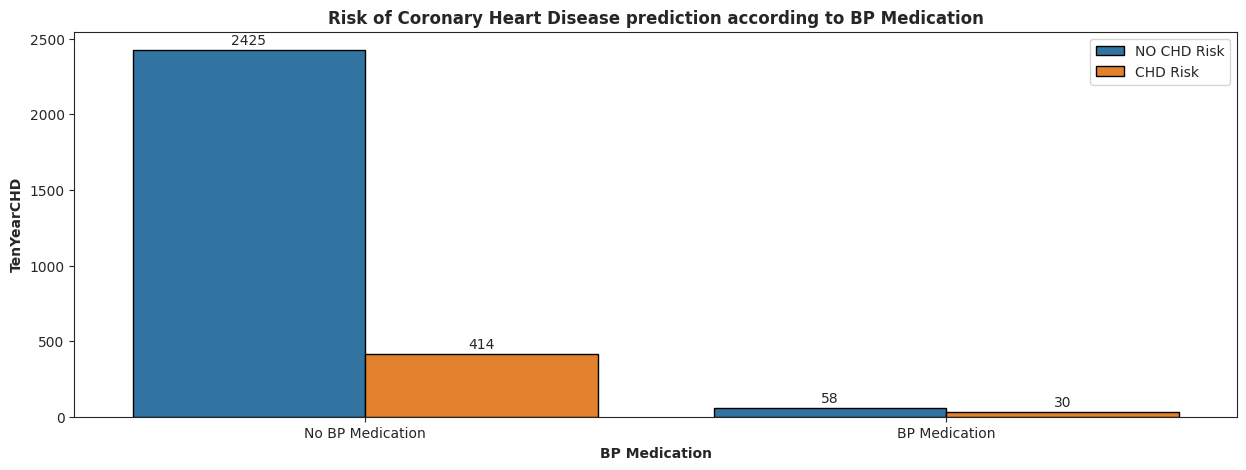

In [227]:
# Chart - 3 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=df['BPMeds'],hue=df['TenYearCHD'],edgecolor='black')
for i,containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding=2)
plt.xticks([0,1],['No BP Medication','BP Medication'])
plt.xlabel('BP Medication',fontweight='bold')
plt.ylabel('TenYearCHD',fontweight='bold')
plt.legend(['NO CHD Risk','CHD Risk'])
plt.title('Risk of Coronary Heart Disease prediction according to BP Medication',fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

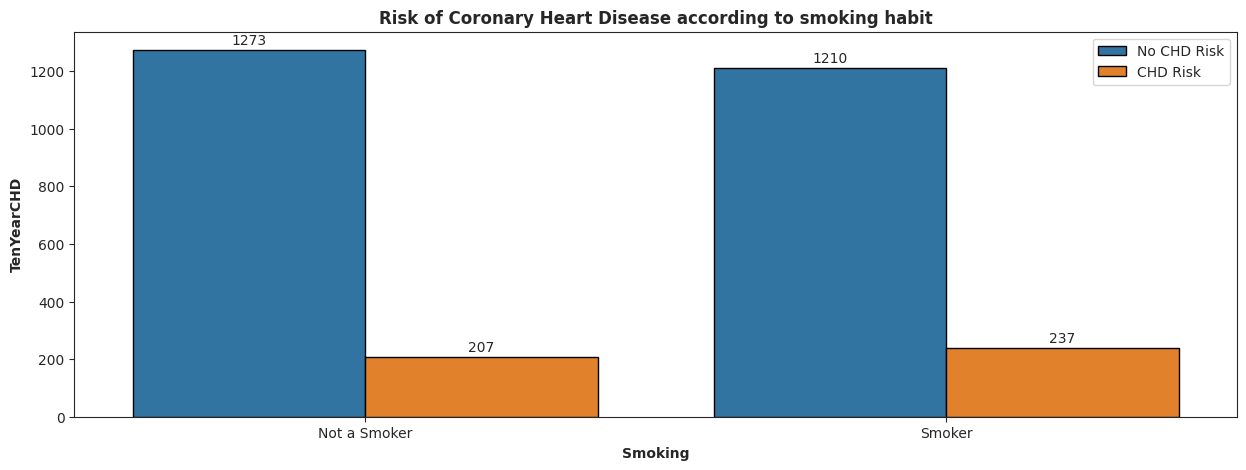

In [228]:
# Chart - 4 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=df['is_smoking'],hue=df['TenYearCHD'],edgecolor='black')
for i,containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding=2)
plt.xlabel('Smoking', fontweight='bold')
plt.xticks([0,1],['Not a Smoker','Smoker'])
plt.ylabel('TenYearCHD', fontweight='bold')
plt.title('Risk of Coronary Heart Disease according to smoking habit',fontweight='bold',fontsize=12)
plt.legend(['No CHD Risk','CHD Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

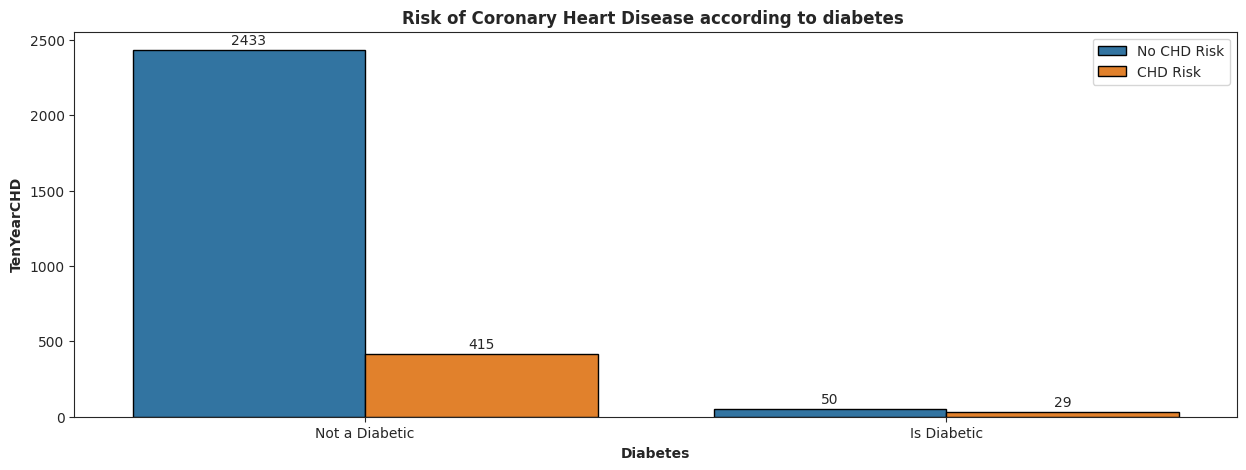

In [229]:
# Chart - 5 visualization code
plt.figure(figsize = (15,5))
sns.countplot(x=df['diabetes'],hue=df['TenYearCHD'],edgecolor='black')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xticks([0,1],['Not a Diabetic','Is Diabetic'])
plt.xlabel('Diabetes',fontweight='bold')
plt.ylabel('TenYearCHD',fontweight='bold')
plt.legend(['No CHD Risk','CHD Risk'])
plt.title('Risk of Coronary Heart Disease according to diabetes ', fontweight = 'bold', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

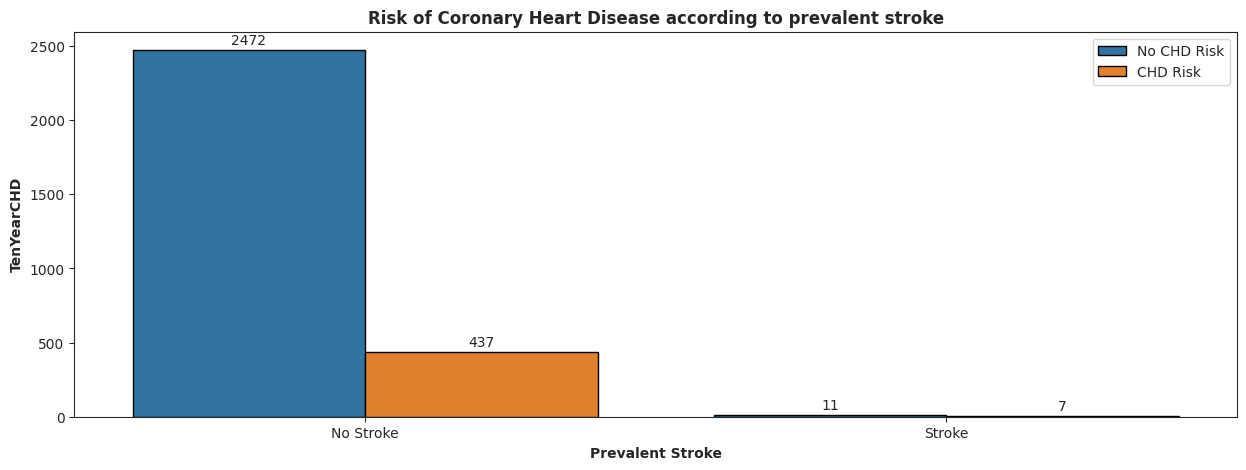

In [230]:
# Chart - 6 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=df['prevalentStroke'],hue=df['TenYearCHD'],edgecolor='black')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xticks([0,1],['No Stroke','Stroke'])
plt.xlabel('Prevalent Stroke',fontweight='bold')
plt.ylabel('TenYearCHD',fontweight='bold')
plt.legend(['No CHD Risk','CHD Risk'])
plt.title('Risk of Coronary Heart Disease according to prevalent stroke',fontweight='bold',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

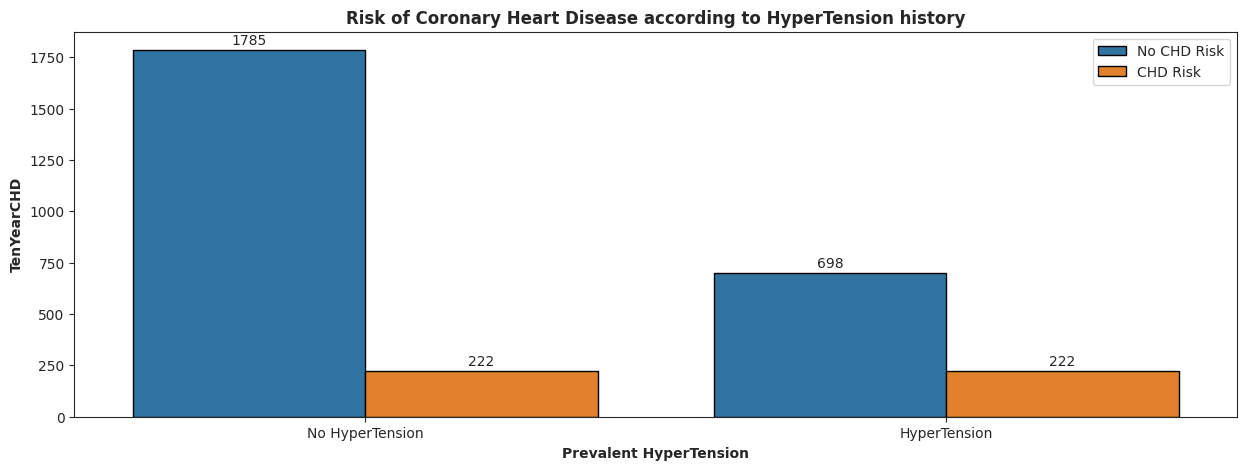

In [231]:
# Chart - 7 visualization code
plt.figure(figsize = (15,5))
sns.countplot(x=df['prevalentHyp'],hue=df['TenYearCHD'],edgecolor='black')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xticks([0,1],['No HyperTension','HyperTension'])
plt.xlabel('Prevalent HyperTension',fontweight='bold')
plt.ylabel('TenYearCHD',fontweight='bold')
plt.title('Risk of Coronary Heart Disease according to HyperTension history', fontweight='bold', fontsize=12)
plt.legend(['No CHD Risk','CHD Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

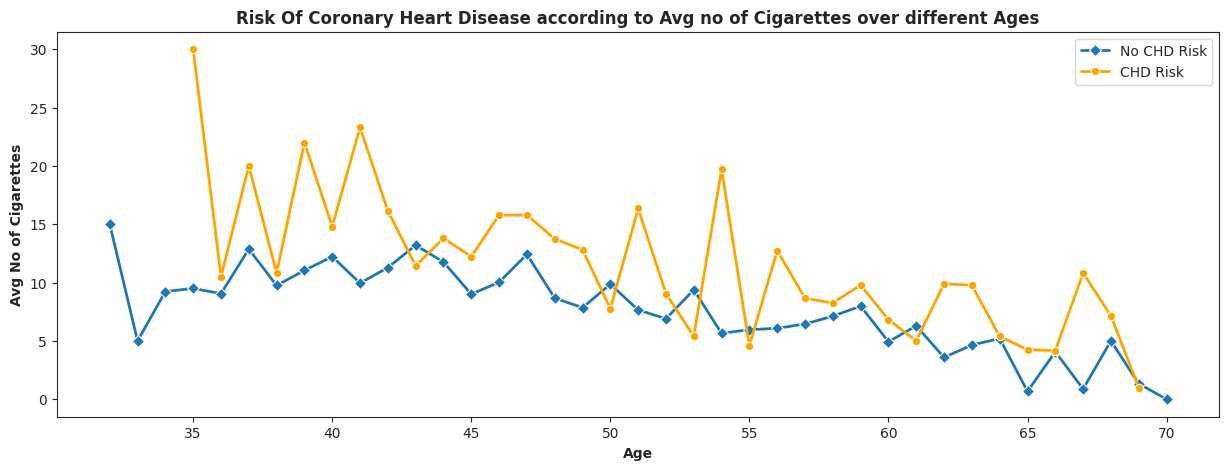

In [232]:
# Chart - 8 visualization code
avg_no_of_cig = df.groupby(['age','TenYearCHD'])['cigsPerDay'].mean().round(2).unstack('TenYearCHD')

plt.figure(figsize=(15,5))

sns.lineplot(x=avg_no_of_cig.index, y=avg_no_of_cig.values[:,0], label='No CHD Risk', linewidth=2, marker='D')
sns.lineplot(x=avg_no_of_cig.index, y=avg_no_of_cig.values[:,1], label='CHD Risk', color='orange', linewidth=2, marker='o')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Avg No of Cigarettes', fontweight='bold')
plt.title('Risk Of Coronary Heart Disease according to Avg no of Cigarettes over different Ages', fontweight='bold', fontsize=12)
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

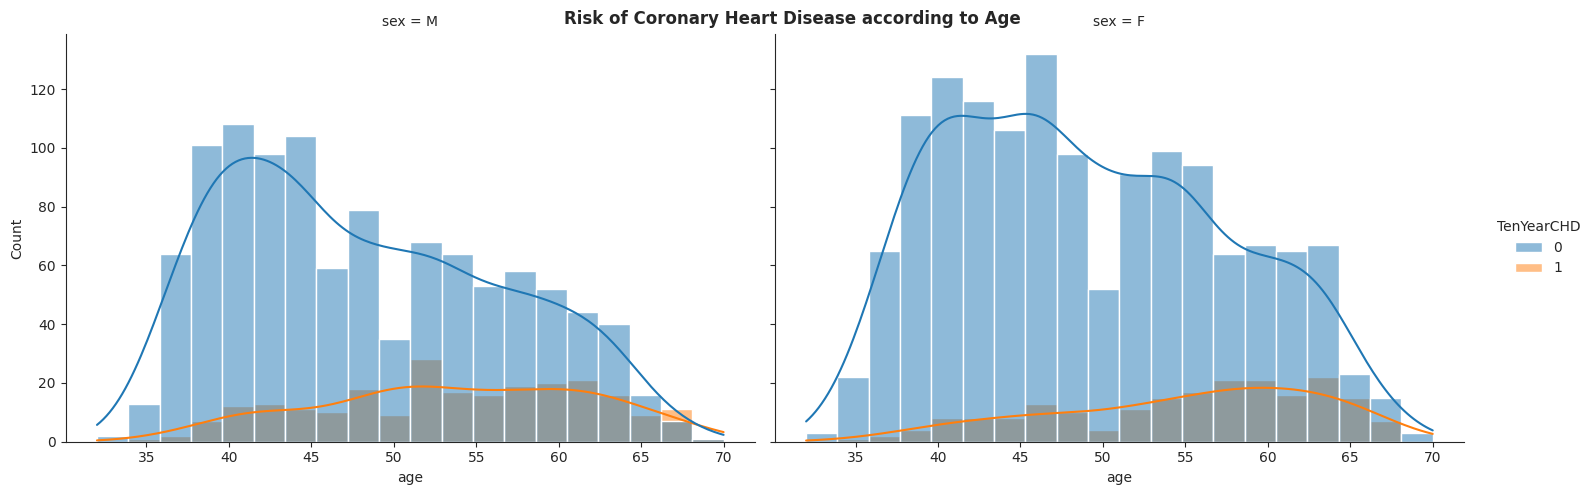

In [233]:
# Chart - 9 visualization code

sns.displot(x=df['age'],hue=df['TenYearCHD'],col=df['sex'],kde=True, height=5,aspect=1.5,legend=True)
plt.ylabel('TenYearCHD',fontweight='bold')
plt.suptitle('Risk of Coronary Heart Disease according to Age',fontweight='bold',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

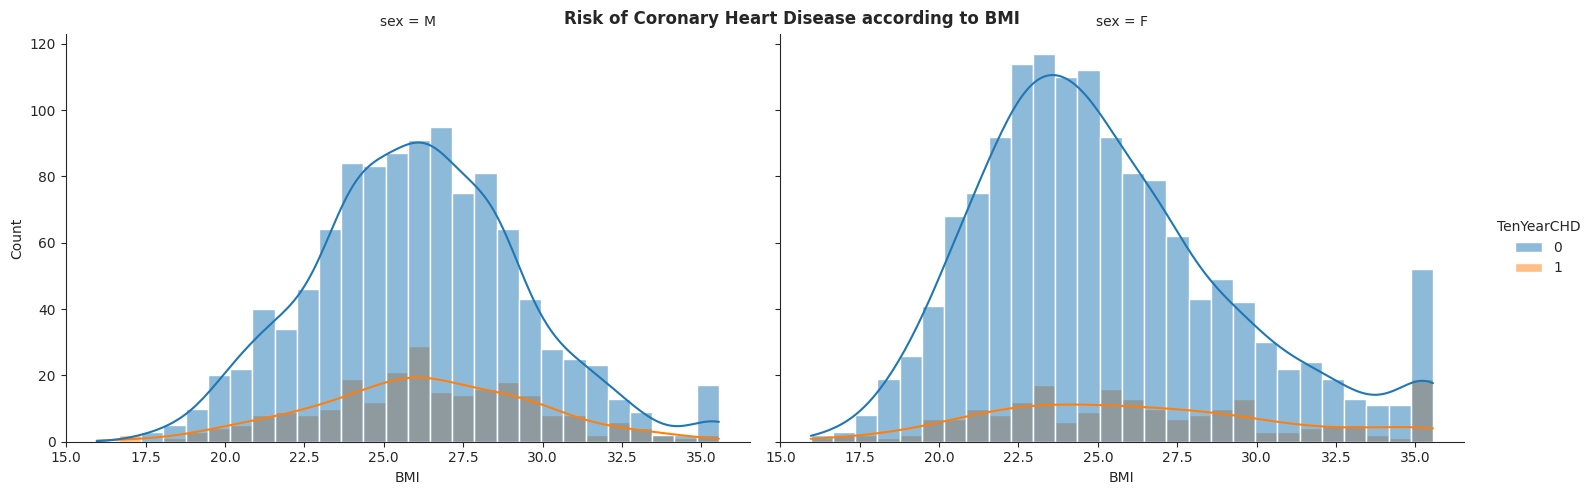

In [234]:
# Chart - 10 visualization code
sns.displot(x=df['BMI'],hue=df['TenYearCHD'],col=df['sex'], kde=True,height=5,aspect=1.5,legend=True)
plt.suptitle('Risk of Coronary Heart Disease according to BMI',fontweight='bold',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

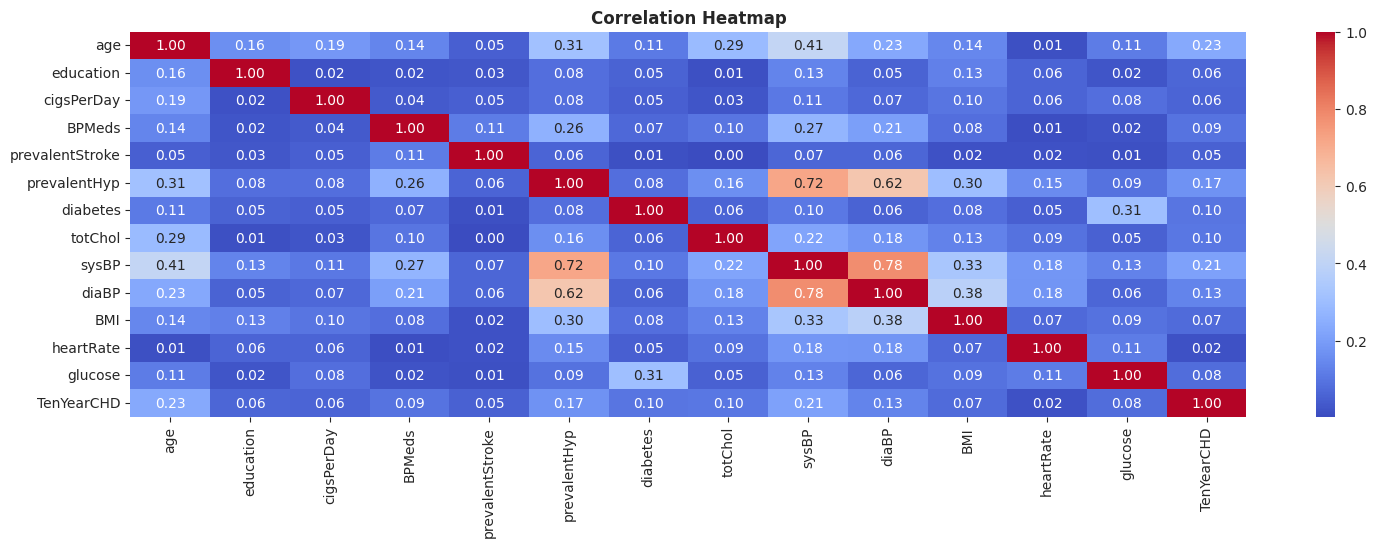

In [245]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,5))
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm',cbar=True,fmt='.2f')
plt.title('Correlation Heatmap',fontweight='bold',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

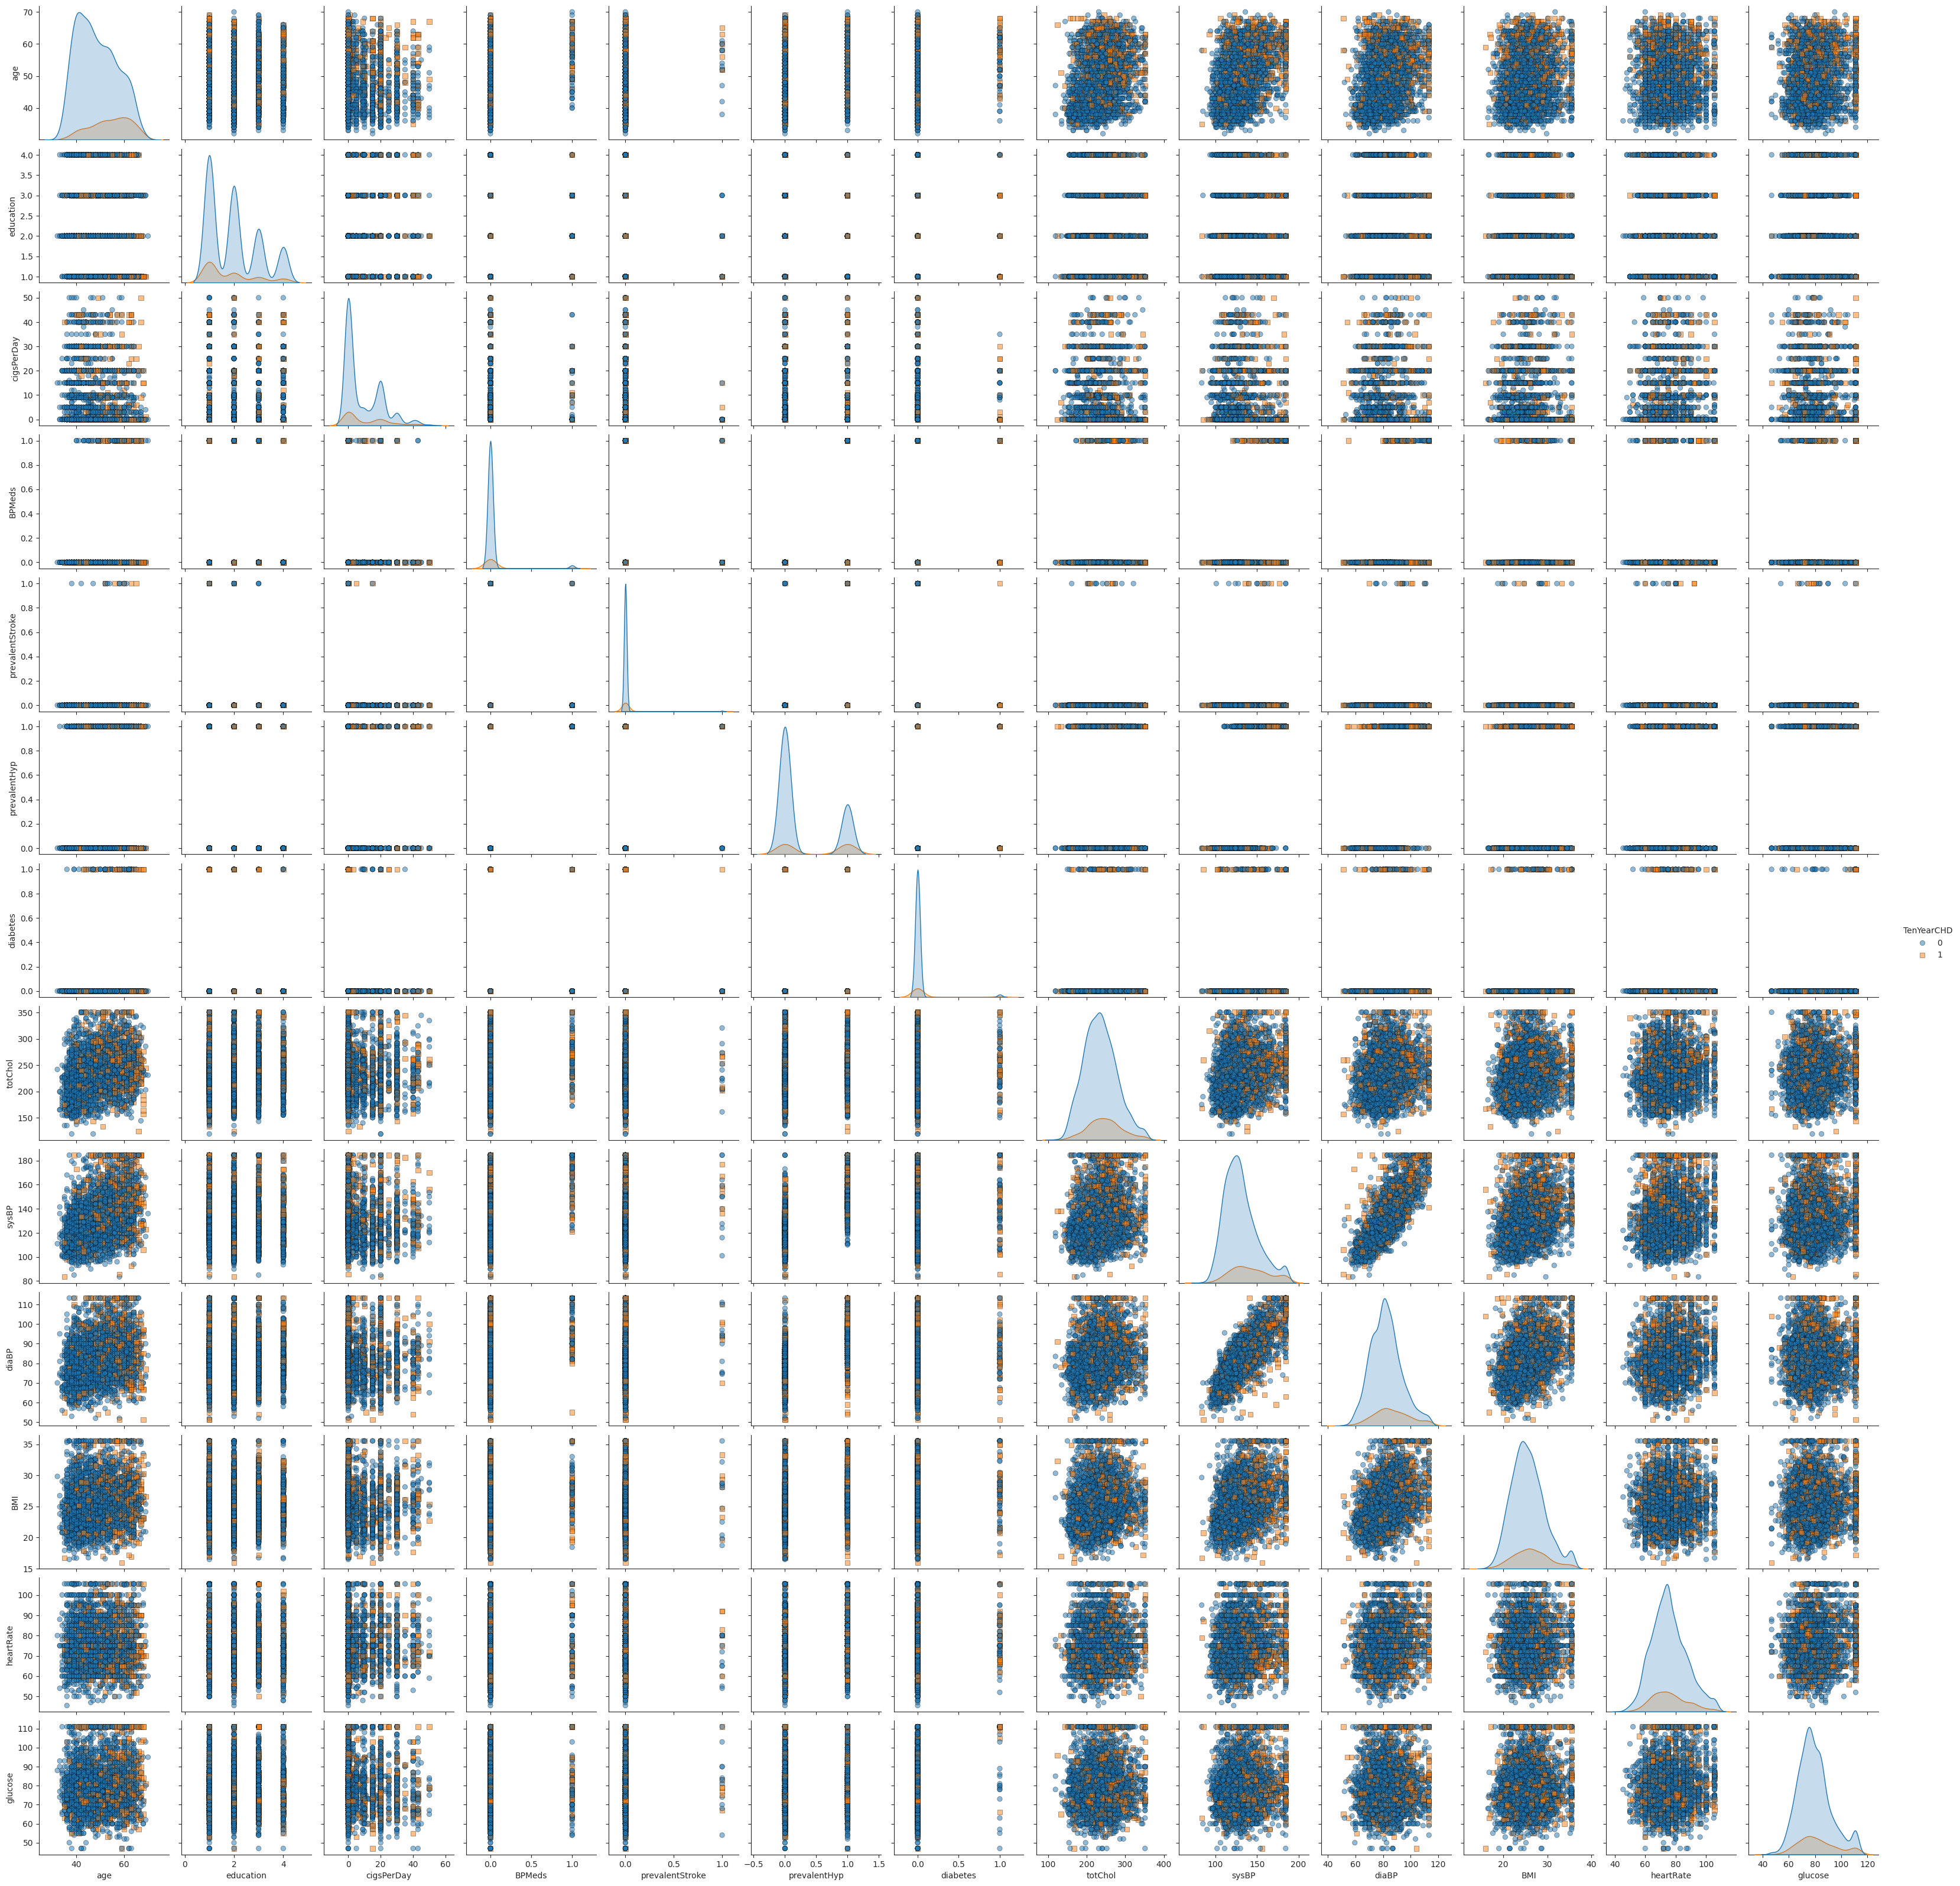

In [251]:
# Pair Plot visualization code
sns.pairplot(df,hue='TenYearCHD',markers=['o','s'],plot_kws={'alpha':0.5,'edgecolor':'black'})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***